<a href="https://colab.research.google.com/github/Pragna235/Data-Preprocessing/blob/main/Decision_Tree_Model_on_Loan_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Decision Tree Model building on Loan Data Analysis

# Importing Modules and Libraries

In [1]:
!pip install decision-tree-id3

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 3.5 MB/s eta 0:00:00
  Created wheel for decision-tree-id3: filename=decision_tree_id3-0.1.2-py3-none-any.whl size=15939 sha256=78952b92cd0c32d709b1e59fc00dd1a5ba17c900c88022b70c9a7199214cb992
  Stored in directory: /root/.cache/pip/wheels/b5/48/52/e8ac7a547a6343fce8e441f4db4a9052c7a8547fd91f413363
Successfully built decision-tree-id3


In [2]:
#Import necessary modules and libraries
import matplotlib.pyplot as plt
import pandas as pd
import six
import sys
sys.modules['sklearn.externals.six'] = six
from id3 import Id3Estimator

# Reading the Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Read the Loan Dataset
data = pd.read_csv("/content/drive/MyDrive/loan_dataset.csv")
data

,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanTerm,CreditScore,LoanApproval
0,4000,4000.0,150,360,780,0
1,10000,3500.0,100,180,710,1
2,5500,2000.0,160,360,690,1
3,4500,2000.0,250,360,680,0
4,9000,2000.0,150,360,780,1
5,4000,3000.0,80,180,680,0
6,4000,5000.0,80,360,680,0
7,4500,1200.0,90,360,700,1
8,4500,0.0,200,240,650,0
9,8000,2000.0,180,300,740,0


In [6]:

# print first 5 rows of dataset
data.head()


,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanTerm,CreditScore,LoanApproval
0,4000,4000.0,150,360,780,0
1,10000,3500.0,100,180,710,1
2,5500,2000.0,160,360,690,1
3,4500,2000.0,250,360,680,0
4,9000,2000.0,150,360,780,1


In [7]:
#print last 5 rows
data.tail()

,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanTerm,CreditScore,LoanApproval
15,6000,500.0,200,360,730,1
16,5000,3000.0,180,240,720,1
17,7000,2000.0,160,180,700,1
18,7000,2000.0,150,360,760,1
19,3500,5000.0,200,360,650,0


In [8]:
#print shape of the dataset
data.shape

(20, 6)

# Defining input and output features


In [9]:
# Segregate the input and output features
y = data["LoanApproval"]
x = data.drop(["LoanApproval"],axis=1)

In [10]:
# Initialize & train decision tree model
from sklearn.tree import DecisionTreeClassifier,export_text

clf = DecisionTreeClassifier(criterion="entropy")   #Id3 algorithm uses entropy
clf.fit(x,y)

#Print the textual representation of the decision tree
tree_rules = export_text(clf,feature_names=list(x.columns))
print(tree_rules)

|--- CreditScore <= 685.00
|   |--- class: 0
|--- CreditScore >  685.00
|   |--- CreditScore <= 735.00
|   |   |--- CreditScore <= 695.00
|   |   |   |--- LoanAmount <= 155.00
|   |   |   |   |--- class: 0
|   |   |   |--- LoanAmount >  155.00
|   |   |   |   |--- class: 1
|   |   |--- CreditScore >  695.00
|   |   |   |--- class: 1
|   |--- CreditScore >  735.00
|   |   |--- LoanAmount <= 165.00
|   |   |   |--- ApplicantIncome <= 5500.00
|   |   |   |   |--- class: 0
|   |   |   |--- ApplicantIncome >  5500.00
|   |   |   |   |--- class: 1
|   |   |--- LoanAmount >  165.00
|   |   |   |--- class: 0



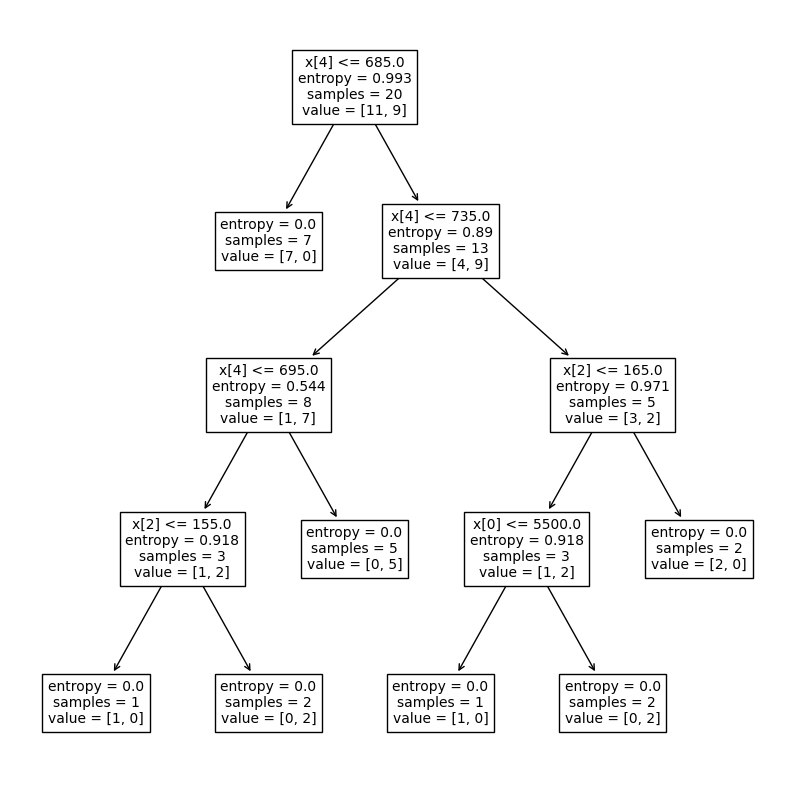

In [11]:
#Generate & print the textual representation of the decision tree
from sklearn import tree

fig,ax = plt.subplots(figsize=(10,10))
tree.plot_tree(clf,fontsize=10)
plt.show()

# Visualization


In [12]:
from sklearn.tree import export_graphviz
from id3 import Id3Estimator,export_text
import graphviz

#Export the decision tree as a DOT file
dot_data = export_graphviz(clf,feature_names=list(x.columns),filled=True,rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)

# Save the graph as a png file or display it
graph.render("decision_tree",format='png',cleanup=True)

'decision_tree.png'

# Fitting the model

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

#split the dataset into training and test datasets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4,random_state = 42)

#create object estimator
estimator = Id3Estimator()
# fit the training data into the object and train the model
estimator.fit(x_train,y_train)
#test the estimator using independent features and get the predicted values
y_pred = estimator.predict(x_test)

#get the classification report of the actual and predicted values
print("Classification Report : ")
print(classification_report(y_test,y_pred))

#print the accuracy score of the actual and predicted values
print("Accuracy Score : ",accuracy_score(y_test,y_pred))

Classification Report : 
              precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.50      0.33      0.40         3

    accuracy                           0.62         8
   macro avg       0.58      0.57      0.56         8
weighted avg       0.60      0.62      0.60         8

Accuracy Score :  0.625


# Try tree_rules for training dataset

In [26]:
# Initialize & train decision tree model
from sklearn.tree import DecisionTreeClassifier,export_text
from id3 import Id3Estimator,export_text

#Id3 algorithm uses entropy
estimator = Id3Estimator()
estimator.fit(x_train,y_train)

#Print the textual representation of the decision tree
tree_rules = export_text(estimator.tree_,feature_names=list(x_train.columns))
print(tree_rules)


CreditScore <=685.00: 0 (3) 
CreditScore >685.00
|   LoanTerm <=330.00
|   |   ApplicantIncome <=5500.00: 1 (1) 
|   |   ApplicantIncome >5500.00: 0 (3) 
|   LoanTerm >330.00: 1 (5) 

